## Одномерная однофазная фильтрация сжимаемой жидкости

### Уравнения

Уравнения неразрывности и движения для однофазного потока в неупругой пористой среде
$$ \begin{cases}
\frac{\partial \rho}{\partial t} + \nabla \cdot (\rho \vec{v}) = 0 \\
\vec{v} = -\frac{k}{\mu} \nabla P \\
\end{cases} $$

Так как жидкость теперь сжимаемая, то к этой системе добавляется уравнение состояния
$$ \begin{cases}
\frac{\partial \rho}{\partial t} + \nabla \cdot (\rho \vec{v}) = 0 \\
\vec{v} = -\frac{k}{\mu} \nabla P \\
\rho = f(P) \\
\end{cases} $$

Сжимаемость жидкости определяется следующим уравнением

$$
\beta = - \frac{1}{V} \frac{\partial V}{\partial P} = \frac{1}{\rho} \frac{\partial \rho}{\partial P}
$$


В результате интегрирования получим
$$
\rho = \rho_0 e^{\beta (P - P_0)}
$$

$$ \begin{cases}
\frac{\partial \rho}{\partial t} + \nabla \cdot (\rho \vec{v}) = 0 \\
\vec{v} = -\frac{k}{\mu} \nabla P \\
\rho = \rho_0 e^{\beta (P - P_0)} \\
\end{cases} $$

Пусть поток одномерен

$$ \begin{cases}
\frac{\partial \rho}{\partial t} + \frac{\partial \rho v}{\partial x} = 0 \\
v = -\frac{k}{\mu} \frac{\partial P}{\partial x} \\
\rho = \rho_0 e^{\beta (P - P_0)} \\
\end{cases} $$

Подставим уравнение состояние в уравнение неразрывности
$$\frac{\partial \rho_0 e^{\beta (P - P_0)}}{\partial t} + \frac{\partial v \rho_0 e^{\beta (P - P_0)}}{\partial x} = 0
$$

$$\frac{\partial  e^{\beta P}}{\partial t} + \frac{\partial v  e^{\beta P}}{\partial x} = 0
$$

Подставим уравнение движения в полученное уравнение 

$$\frac{\partial  e^{\beta (P - P_0)}}{\partial t} -  \frac{k}{\mu} \frac{\partial  \frac{\partial P}{\partial x}  e^{\beta (P - P_0)}}{\partial x} = 0
$$

$$\frac{\mu}{k} \frac{\partial  e^{\beta P}}{\partial t} -  e^{\beta P} \frac{\partial^2 P}{\partial x^2} - \frac{\partial P}{\partial x} \frac {\partial e^{\beta P}}{\partial x} = 0
$$

### Численное решение

Дискретизируем методом конечных разностей по явной схеме
$$\frac{\mu}{k} \frac{e^{\beta P_{i}^{n+1}} - e^{\beta P_{i}^{n}}}{\tau} - e^{\beta P_i^n} \frac{P_{i-1}^{n} - 2P_i^n + P_{i+1}^n}{h^2} - \frac{P_{i}^n - P_{i-1}^n}{h^2} \left(e^{\beta P_{i}^{n}} - e^{\beta P_{i-1}^{n}}\right) = 0

$$
P_i^{n+1} = \frac{1}{\beta} \ln{\left[ e^{\beta P_i^n} + \frac{k \tau}{\mu h^2} \left(e^{\beta P_{i}^{n}} (P_{i+1}^n - P_i^n) + e^{\beta P_{i-1}^{n}} (P_{i-1}^n - P_i^n) \right) \right]}
$$

In [5]:
%load_ext autoreload
%autoreload 2

import numpy as np
import matplotlib.pyplot as plt

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [6]:
# Кол-во узловых точек
nx = 10
nt = 1000

# Длина расчетной области
L = 0.15
T = 60

# Физ параметры
k = 10**(-12)
mu = 10**(-3)
beta = 5*10**(-5)

# Граничные условия (начало и конец расчетной области)
P0 = 0.01 * 10**6
Pn = 0.02 * 10**6

P = np.zeros([nt, nx])
# нач условия
P[0][:] = Pn
# гран условия
P[:, 0] = P0
P[:, -1] = Pn

tau = T / (nt - 1)
h = L / (nx - 1)

In [7]:
a = k * tau / mu / (h*h)
# print(a)
for n in range(0, nt-1):
    for i in range(1, nx-1):
        skbka = np.exp(beta * P[n, i]) * (P[n, i+1] - P[n, i]) + np.exp(beta * P[n, i-1]) * (P[n, i-1] - P[n, i])
        P[n+1, i] = np.log(np.exp(beta * P[n, i]) + a * skbka) / beta

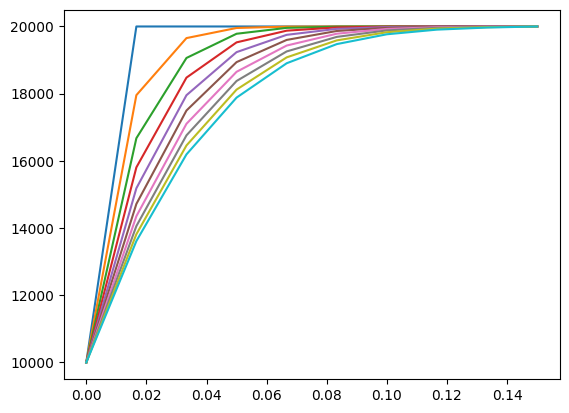

In [8]:
for i in range(P.shape[0]):
    if i % 100 == 0:
        plt.plot(np.arange(0, L+h/2, h), P[i])

plt.show()